In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import numpy as np
from scipy import interpolate, stats

In [3]:
def extract_plates(path, sheet_list):
    """Will return a sublist of plates absorbance information in dataframe format
    Must ensure that excel sheet has only the samples made in the csv plan as will cause errors downstream."""
    plate_dfs = []
    for sheet_name in sheet_list:
        plate_df = pd.read_excel(path, sheet_name = sheet_name).T
        plate_dfs.append(plate_df)
    return plate_dfs

In [4]:
def merge_wavelength_dfs(df_list):
    merge_list = []
    for i, df in enumerate(df_list):
        if i == 0:
            df = df
        else: 
            df = df.drop(['Wavelength'])
        merge_list.append(df)
    return pd.concat(merge_list)

In [5]:
def baseline_correction(df_samples, baseline_series): 
    """Given the series iloc of a the blank, subtracts the value at every wavelength of blank at resp. wavelength. 
    Simple subtraction blanking."""
    new_df_con = []
    for key, row in df_samples.iterrows():
        if key == 'Wavelength':
            wavelengths = row
            new_df_con.append(wavelengths)
        else: 
            series = row
            corrected = series.subtract(baseline_series)
            new_df_con.append(corrected)
    
    baseline_corrected_df = pd.concat(new_df_con, axis = 1).T
    baseline_corrected_df.index = df_samples[0].index
    return baseline_corrected_df

In [6]:
def add_abs_to_sample_info(sample_info_df, abs_df):
    
    wavelengths = list(abs_df.loc['Wavelength'])
    wavelengths_names = [str(wavelength)+'nm' for wavelength in wavelengths]
    abs_df.columns = wavelengths_names
    
    
    sample_info_df.reset_index(drop=True, inplace=True)
    abs_df.reset_index(drop=True, inplace=True)
    combined_df = pd.concat([sample_info, abs_df], axis = 1)
    return combined_df

In [7]:
def remove_visual_outliers(x, y, z, z_score_threshold = 3):
    """This is not a to remove statistical outliers, only to remove values which present. Outliers will be 
    removed based on the data of z and subsequently from x and y given the same indexes of entries. Inputs must be nparrays"""

    z_array = np.asarray(z)
    z_scores = np.abs(stats.zscore(np.asarray(z)))
    threshold = z_score_threshold
    index_to_remove = np.where(z_scores > threshold)[0] # must be in ascending order
    
    x = x.copy()
    y = y.copy()
    z = z.copy()
    
    for index in reversed(index_to_remove): # reveresed to perserve index
        del x[index]
        del y[index]
        del z[index]
    
    xyz_array = [x,y,z]
    return xyz_array


In [8]:
# theoretically pulled from gdrive
sample_info = pd.read_csv(r"C:\Users\Edwin\Desktop\11_17_2020\experiment_info") # make it find the blank position from sample_info

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Wavelength,200.000,250.000,300.000,350.000,400.000,450.000,500.000,550.000,600.000,650.000,700.000,750.000,800.000,850.000,900.000
A1,3.489,3.746,0.699,0.274,0.060,0.049,0.046,0.046,0.045,0.044,0.043,0.051,0.049,0.054,0.069
A2,3.477,3.733,0.668,0.251,0.059,0.047,0.044,0.042,0.041,0.039,0.039,0.046,0.045,0.051,0.066
A3,3.485,3.761,0.729,0.279,0.059,0.049,0.044,0.042,0.041,0.039,0.039,0.045,0.043,0.049,0.064
A4,3.473,3.750,0.687,0.246,0.059,0.048,0.043,0.042,0.041,0.039,0.039,0.045,0.044,0.049,0.065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F4,3.472,3.735,0.617,0.217,0.060,0.050,0.047,0.046,0.046,0.044,0.043,0.049,0.047,0.052,0.067
F5,3.463,3.732,0.611,0.209,0.056,0.046,0.043,0.042,0.041,0.039,0.039,0.045,0.043,0.049,0.063
F6,3.459,3.719,0.616,0.205,0.055,0.045,0.042,0.041,0.040,0.038,0.038,0.045,0.043,0.048,0.063
F7,3.472,3.747,0.657,0.229,0.057,0.045,0.042,0.041,0.040,0.038,0.038,0.044,0.042,0.047,0.062


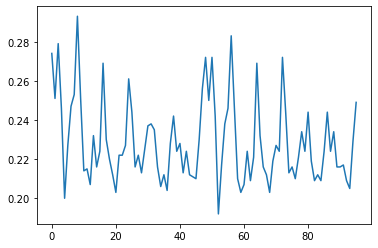

In [145]:
path = r"C:\Users\Edwin\Downloads\02_17_21_2Plate1.xlsx"
plate_names = ['Sheet1','Sheet2']
plate_dfs = extract_plates(path, plate_names) # can edit/remove wells accidently measured etc, but really should be done at excel level
merged_df = merge_wavelength_dfs(plate_dfs) # a check
yo = merged_df[3].tolist()[1:]
yo = [float(y) for y in yo]
plt.plot(yo)
# plt.ylim([0,1])
merged_df

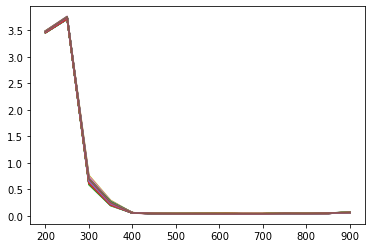

In [147]:
wavelengths = merged_df.loc['Wavelength'].tolist()
merged_df_p = merged_df[1:].reset_index(drop=True).T
merged_df_p

for col in merged_df_p:
    abso = merged_df_p[col].tolist()
    plt.plot(wavelengths, abso)
#     plt.xlim([340,360])
#     plt.ylim([0,0.5])

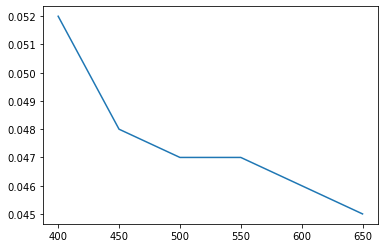

In [136]:
base = baseline_series.to_list()
wave = [400,450,500,550,600,650]
plt.plot(wave, base)

In [129]:
plate_names = ['Sheet1','Sheet2','Sheet3']
plate_dfs = extract_plates(r"C:\Users\Edwin\Desktop\11_18_2020\11_18_2020_Plate123.xlsx", plate_names) # can edit/remove wells accidently measured etc, but really should be done at excel level
merged_df = merge_wavelength_dfs(plate_dfs) # a check
merged_df

,0,1,2,3,4,5
Wavelength,400.000,450.000,500.000,550.000,600.000,650.000
A1,0.078,0.067,0.059,0.054,0.051,0.049
A2,0.080,0.068,0.060,0.057,0.054,0.051
A3,0.083,0.071,0.063,0.058,0.054,0.051
A4,0.080,0.069,0.062,0.059,0.056,0.053
...,...,...,...,...,...,...
A8,0.043,0.040,0.039,0.039,0.040,0.039
A9,0.043,0.041,0.041,0.041,0.040,0.039
A10,0.043,0.041,0.039,0.039,0.040,0.039
A11,0.042,0.041,0.041,0.041,0.041,0.039


In [130]:
# baseline and combine
baseline_series = merged_df.iloc[-1]
merged_baselined_df = baseline_correction(merged_df, baseline_series)
combined_df = add_abs_to_sample_info(sample_info, merged_df)
combined_df

,UID,Component 1 wtf,Component 2 wtf,Component 3 wtf,Component 4 wtf,Component 5 wtf,Slot,Labware,Well,400.0nm,450.0nm,500.0nm,550.0nm,600.0nm,650.0nm
0,UID,dppc wtf,dspe-peg wtf,PFH wtf,ethanol wtf,water wtf,Slot,Labware,Well,400.000,450.000,500.000,550.000,600.000,650.000
1,2020-11-19_ethanol_PFH_A1,0.0003,0.000125,0.0002512820512820513,0.41704545454545455,0.5822782634032634,2,Corning 96 Well Plate 360 µL Flat,A1,0.078,0.067,0.059,0.054,0.051,0.049
2,2020-11-19_ethanol_PFH_A2,0.0003,0.000125,0.0002512820512820513,0.43863636363636366,0.5606873543123543,2,Corning 96 Well Plate 360 µL Flat,A2,0.080,0.068,0.060,0.057,0.054,0.051
3,2020-11-19_ethanol_PFH_A3,0.0003,0.000125,0.0002512820512820513,0.4602272727272727,0.5390964452214453,2,Corning 96 Well Plate 360 µL Flat,A3,0.083,0.071,0.063,0.058,0.054,0.051
4,2020-11-19_ethanol_PFH_A4,0.0003,0.000125,0.0002512820512820513,0.4818181818181818,0.5175055361305361,2,Corning 96 Well Plate 360 µL Flat,A4,0.080,0.069,0.062,0.059,0.056,0.053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2020-11-19_ethanol_PFH_A8,0.0003,0.000125,0.0020666666666666667,0.9136363636363637,0.08387196969696964,6,Corning 96 Well Plate 360 µL Flat,A8,0.043,0.040,0.039,0.039,0.040,0.039
201,2020-11-19_ethanol_PFH_A9,0.0003,0.000125,0.0020666666666666667,0.9352272727272728,0.062281060606060534,6,Corning 96 Well Plate 360 µL Flat,A9,0.043,0.041,0.041,0.041,0.040,0.039
202,2020-11-19_ethanol_PFH_A10,0.0003,0.000125,0.0020666666666666667,0.9568181818181819,0.04069015151515143,6,Corning 96 Well Plate 360 µL Flat,A10,0.043,0.041,0.039,0.039,0.040,0.039
203,2020-11-19_ethanol_PFH_A11,0.0003,0.000125,0.002217948717948718,0.9568181818181819,0.04053886946386942,6,Corning 96 Well Plate 360 µL Flat,A11,0.042,0.041,0.041,0.041,0.041,0.039


In [38]:
combined_df.to_csv(r"C:\Users\Edwin\Desktop\11_18_2020\11_18_20_merged_info", index = False, header=True)


In [39]:
test_open = pd.read_csv(r"C:\Users\Edwin\Desktop\11_18_2020\11_18_20_merged_info")
test_open

,UID,Component 1 wtf,Component 2 wtf,Component 3 wtf,Component 4 wtf,Component 5 wtf,Slot,Labware,Well,400.0nm,450.0nm,500.0nm,550.0nm,600.0nm,650.0nm
0,UID,dppc wtf,dspe-peg wtf,PFH wtf,ethanol wtf,water wtf,Slot,Labware,Well,400.000,450.000,500.000,550.000,600.000,650.000
1,2020-11-19_ethanol_PFH_A1,0.0003,0.000125,0.0002512820512820513,0.41704545454545455,0.5822782634032634,2,Corning 96 Well Plate 360 µL Flat,A1,0.078,0.067,0.059,0.054,0.051,0.049
2,2020-11-19_ethanol_PFH_A2,0.0003,0.000125,0.0002512820512820513,0.43863636363636366,0.5606873543123543,2,Corning 96 Well Plate 360 µL Flat,A2,0.080,0.068,0.060,0.057,0.054,0.051
3,2020-11-19_ethanol_PFH_A3,0.0003,0.000125,0.0002512820512820513,0.4602272727272727,0.5390964452214453,2,Corning 96 Well Plate 360 µL Flat,A3,0.083,0.071,0.063,0.058,0.054,0.051
4,2020-11-19_ethanol_PFH_A4,0.0003,0.000125,0.0002512820512820513,0.4818181818181818,0.5175055361305361,2,Corning 96 Well Plate 360 µL Flat,A4,0.080,0.069,0.062,0.059,0.056,0.053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2020-11-19_ethanol_PFH_A8,0.0003,0.000125,0.0020666666666666667,0.9136363636363637,0.08387196969696964,6,Corning 96 Well Plate 360 µL Flat,A8,0.043,0.040,0.039,0.039,0.040,0.039
201,2020-11-19_ethanol_PFH_A9,0.0003,0.000125,0.0020666666666666667,0.9352272727272728,0.062281060606060534,6,Corning 96 Well Plate 360 µL Flat,A9,0.043,0.041,0.041,0.041,0.040,0.039
202,2020-11-19_ethanol_PFH_A10,0.0003,0.000125,0.0020666666666666667,0.9568181818181819,0.04069015151515143,6,Corning 96 Well Plate 360 µL Flat,A10,0.043,0.041,0.039,0.039,0.040,0.039
203,2020-11-19_ethanol_PFH_A11,0.0003,0.000125,0.002217948717948718,0.9568181818181819,0.04053886946386942,6,Corning 96 Well Plate 360 µL Flat,A11,0.042,0.041,0.041,0.041,0.041,0.039


In [138]:
# extract data by dict method of df calling series
wavelength = '400.0nm'
x_name = combined_df['Component 4 wtf'][0]
y_name = combined_df['Component 3 wtf'][0]
x = [float(i) for i in combined_df['Component 4 wtf'][1:].tolist()][:-1] #ethanol, 
y = [float(i) for i in combined_df['Component 3 wtf'][1:].tolist()][:-1] # pfh
z = [float(i) for i in combined_df[wavelength][1:].tolist()][:-1]
combined_restricted_xyz = [x,y,z]
modi = remove_visual_outliers(x,y,z,2) # this should only be used to find the new vmin and vmax but not to exclude